In [121]:
#Importing required libraries
import os     # Operating System module for file handling
import numpy as np     # Numerical computing library
import pandas as pd    # Data manipulation library

import seaborn as sns   # Statistical data visualization library
import plotly.express as px   # Interactive plotting library
import matplotlib.pyplot as plt   # Plotting library
%matplotlib inline             
from sklearn.cluster import KMeans   # KMeans clustering algorithm
from sklearn.preprocessing import StandardScaler    # Standardization of features
from sklearn.pipeline import Pipeline    # Pipeline for chaining multiple estimators
from sklearn.manifold import TSNE      # t-Distributed Stochastic Neighbor Embedding
from sklearn.decomposition import PCA     # Principal Component Analysis
from sklearn.metrics import euclidean_distances  # Euclidean distances calculation
from scipy.spatial.distance import cdist     # Pairwise distances calculation

  
import warnings   # Warnings control library
warnings.filterwarnings("ignore")    # Ignore warning messages

In [122]:
# Load the datasets 'data.csv', 'data_by_genres.csv', 'data_by_year.csv' into a pandas DataFrame
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')

In [123]:
# Print information about the DataFrame 'data'
print(data.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [124]:
# Print information about the DataFrame 'genre_data'
print(genre_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [125]:
# Print information about the DataFrame 'year_data'
print(year_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


In [126]:
# Install the Yellowbrick library using pip
!pip install yellowbrick



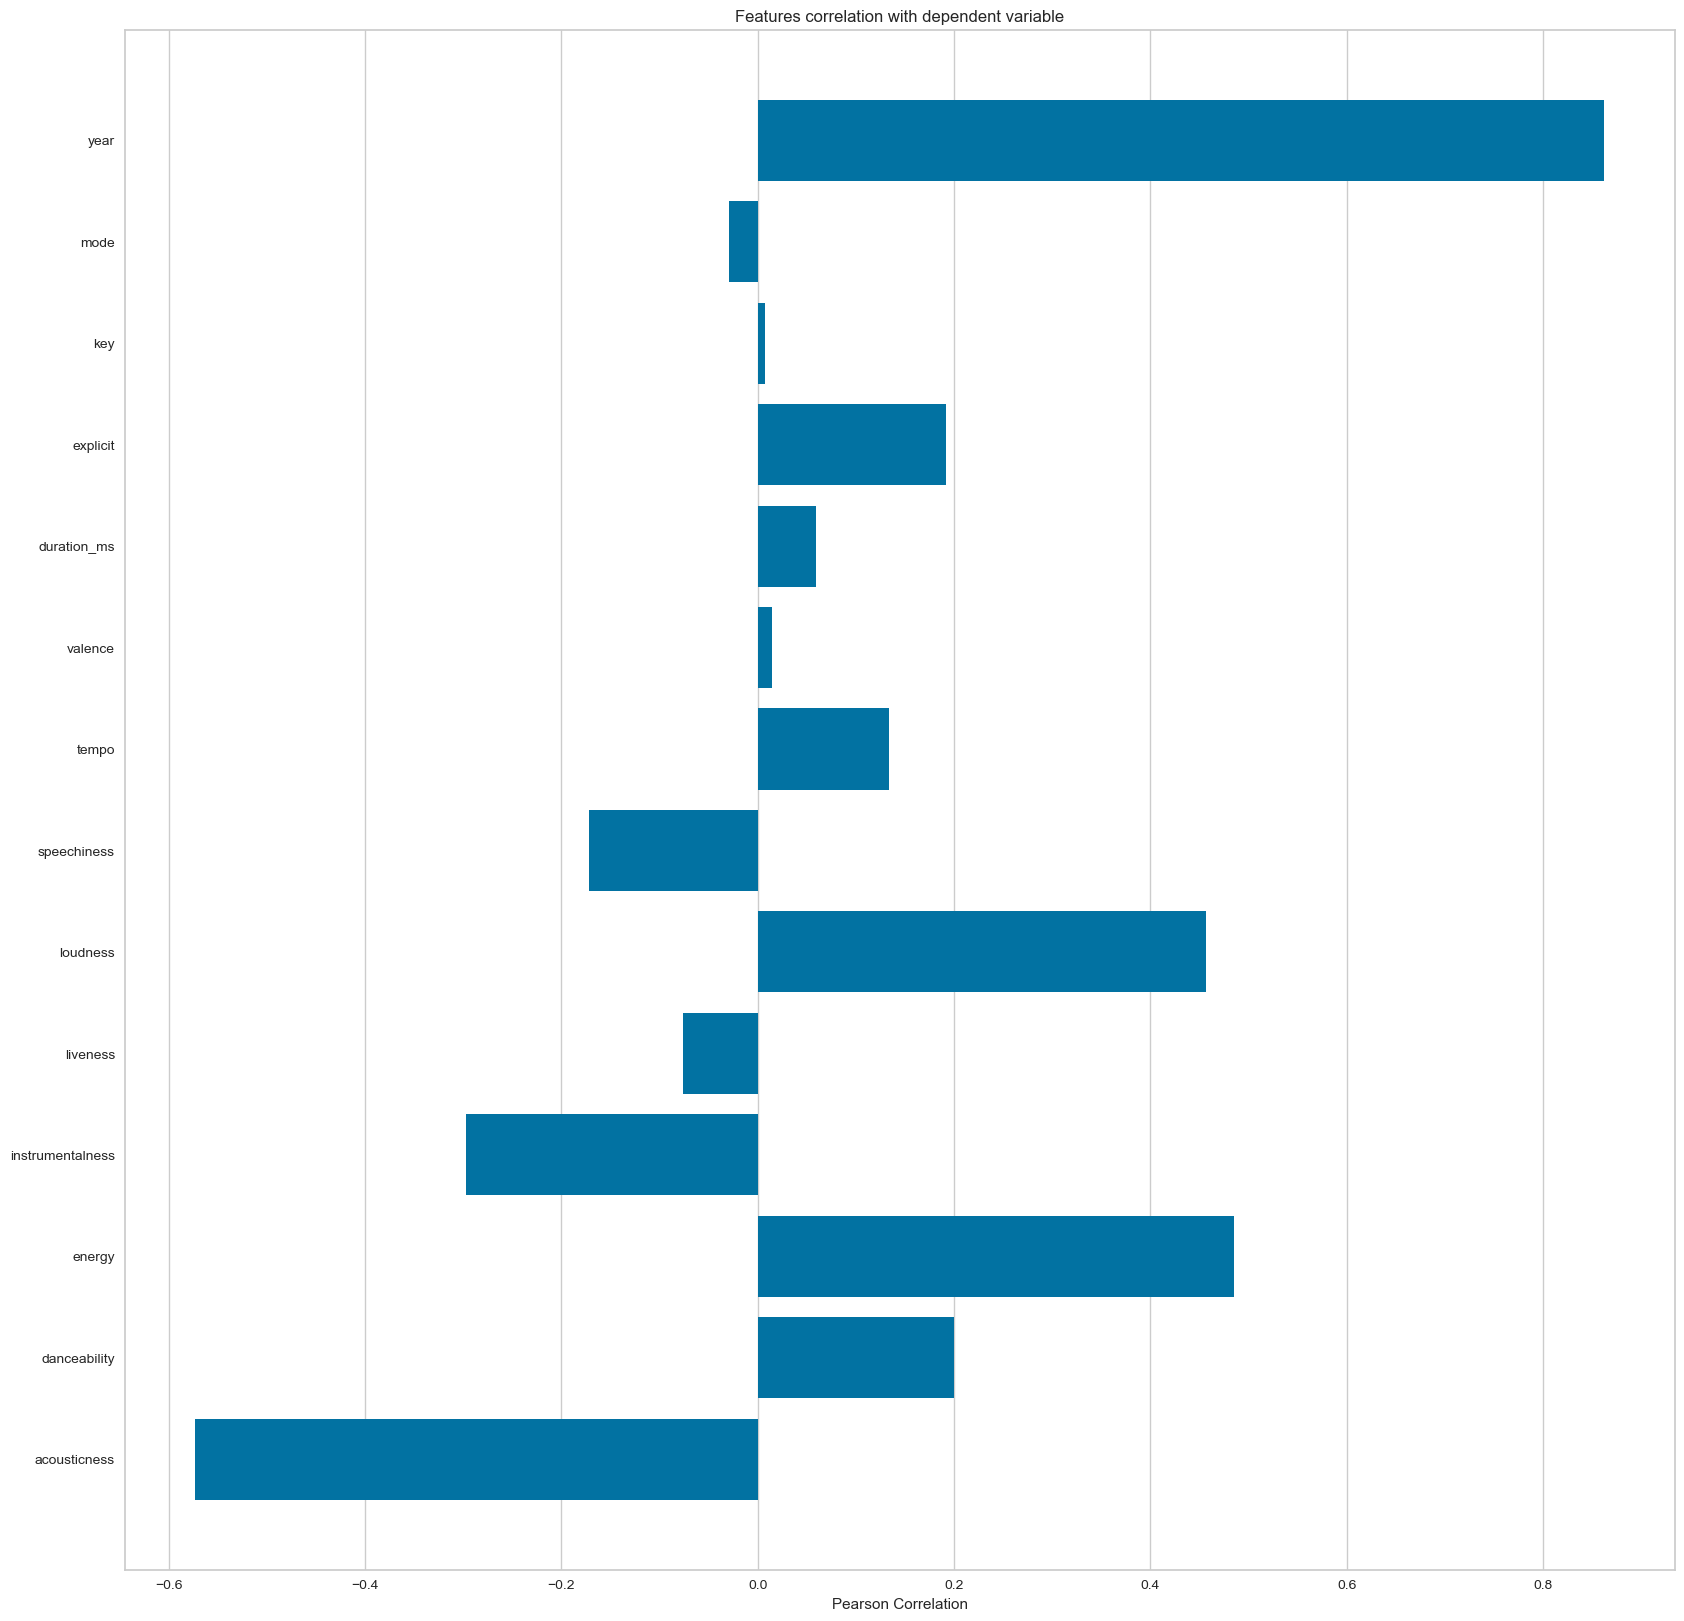

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [127]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

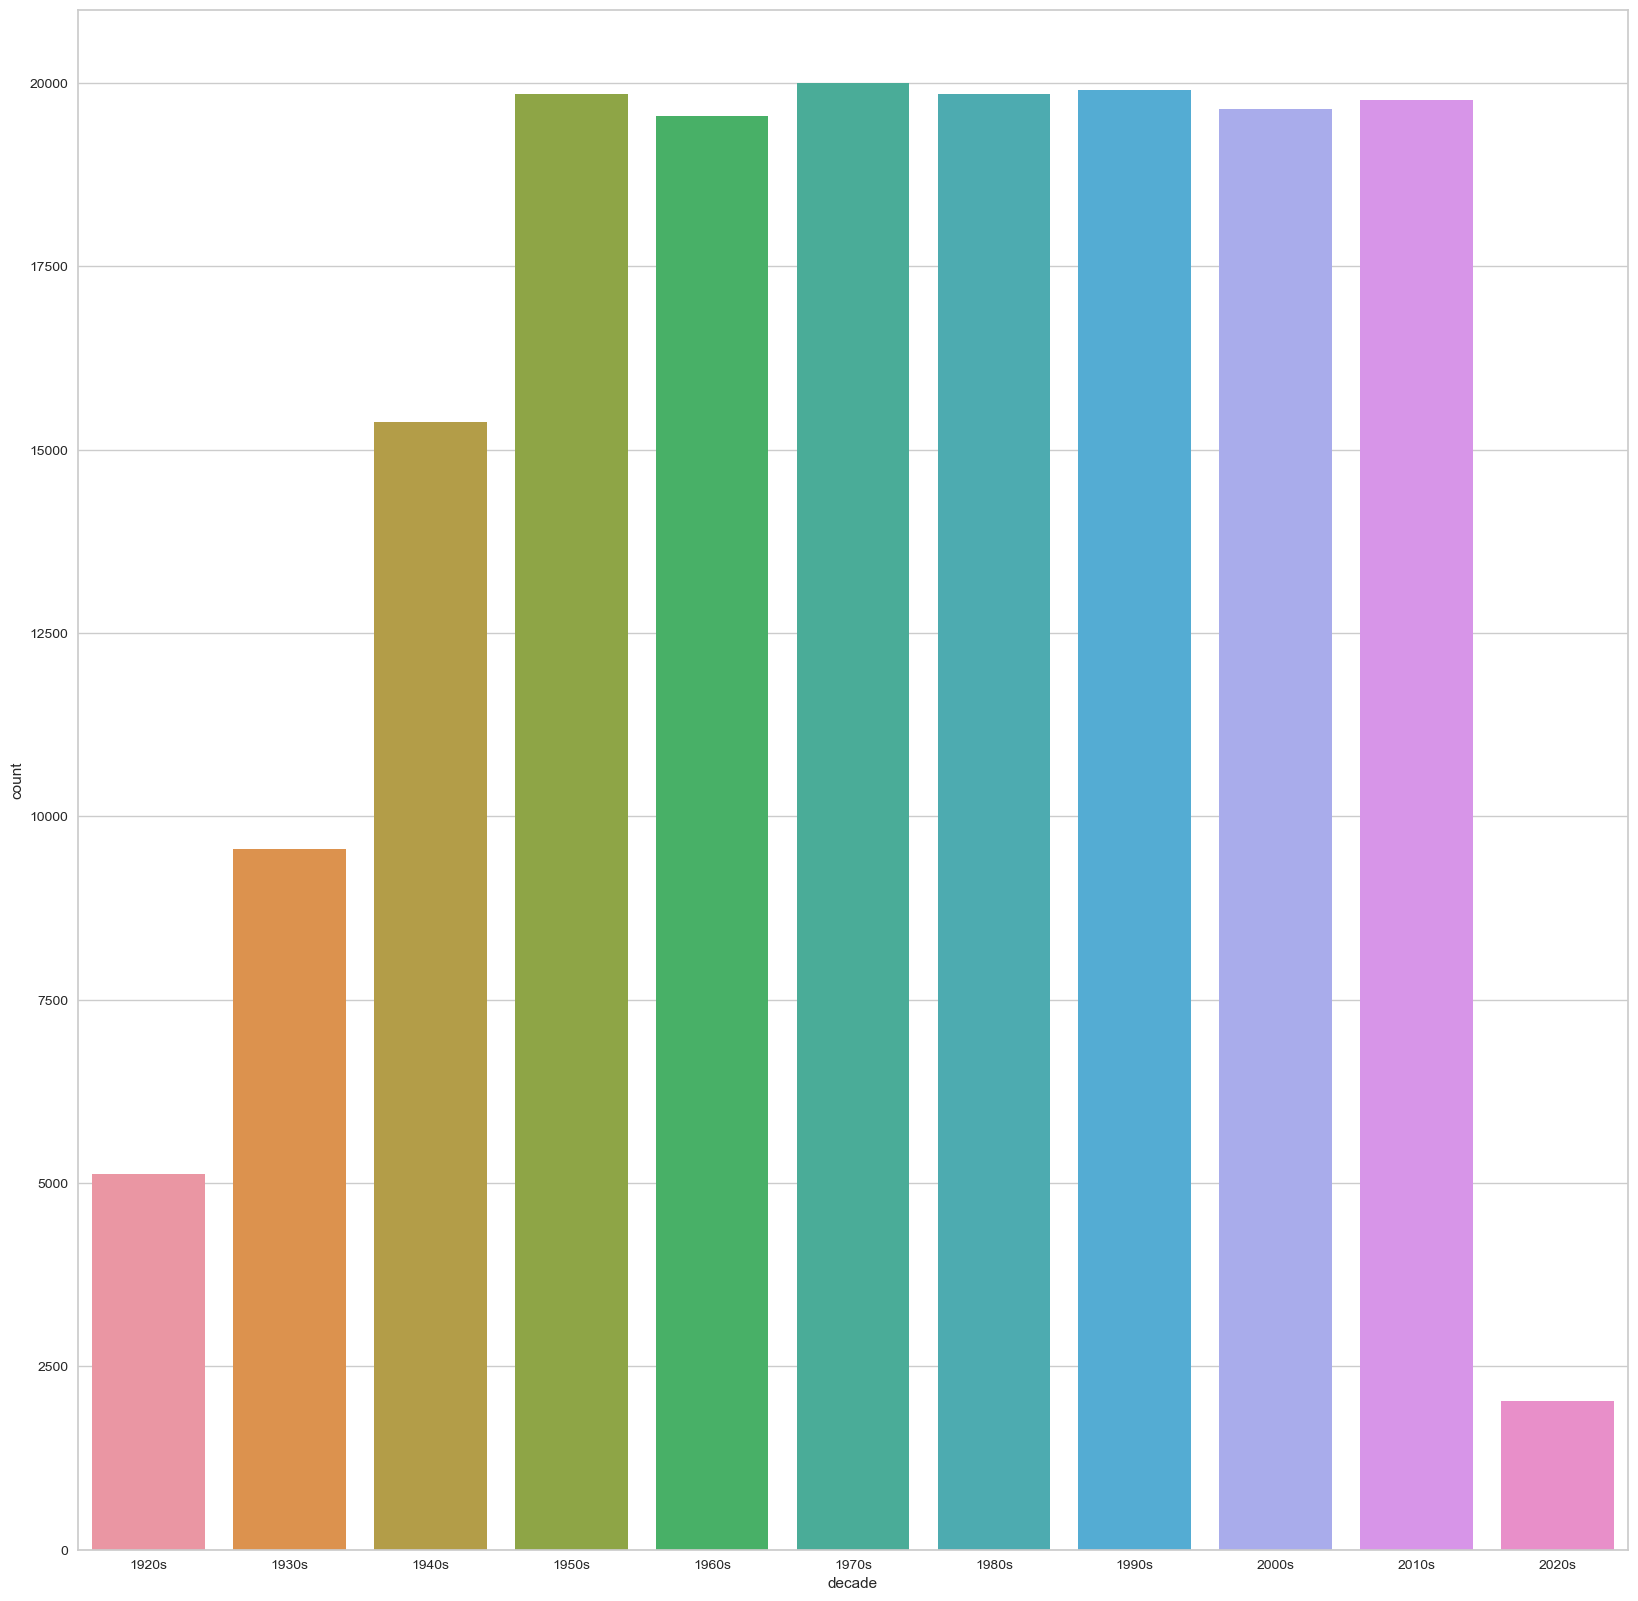

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get decade from year
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

# Apply the function to create the 'decade' column
data['decade'] = data['year'].apply(get_decade)

# Order the decades if needed
decade_order = sorted(data['decade'].unique())

# Convert the 'decade' column to a categorical variable
data['decade'] = pd.Categorical(data['decade'], categories=decade_order)

# Plot the countplot
sns.countplot(data=data, x='decade')
plt.show()


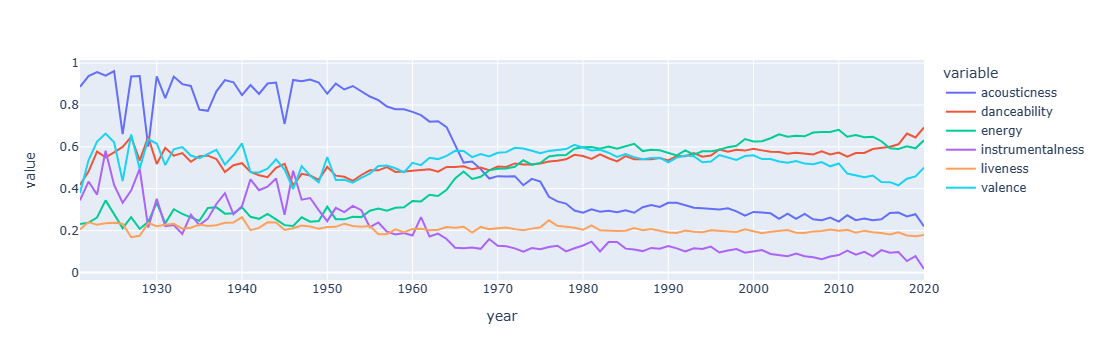

In [129]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

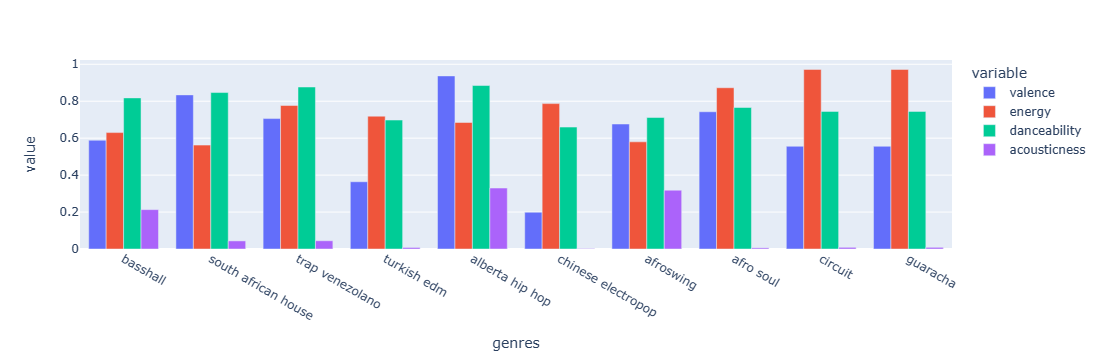

In [130]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()


Clustering Genres with K-Means

In [131]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [132]:
import sklearn
print(sklearn.__version__)


1.4.1.post1


In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])

In [134]:
import pandas as pd

# Load your dataset into genre_data DataFrame
genre_data = pd.read_csv('data_by_genres.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Select numerical columns only
X = genre_data.select_dtypes(include=['float64', 'int64'])


In [140]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and KMeans
cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                             ('kmeans', KMeans(n_clusters=10, n_init=10))])

# Fit the pipeline to your data
X = genre_data.select_dtypes(include=['float64', 'int64'])
cluster_pipeline.fit(X)


Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10, n_init=10))])

In [141]:
print(genre_data.columns)


Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')


In [142]:
X = genre_data.drop(columns=['genres', 'mode'])


In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [144]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_


In [145]:
genre_data['cluster'] = cluster_labels


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.013s...
[t-SNE] Computed neighbors for 2973 samples in 0.520s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.739190
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.746048
[t-SNE] KL divergence after 1000 iterations: 1.508845


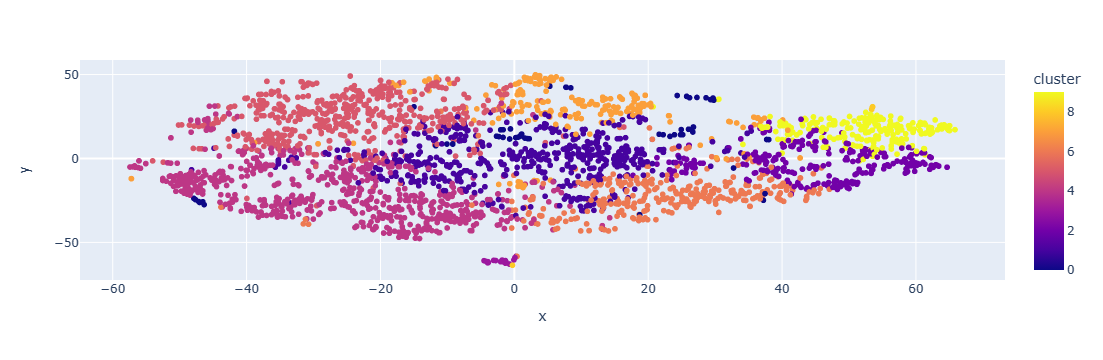

In [146]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

Clustering Songs with K-Means

In [147]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset
data = pd.read_csv('data_by_genres.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Select numerical columns only
X = data.select_dtypes(include=['float64', 'int64'])
number_cols = list(X.columns)

# Now you can use 'data' for clustering


In [148]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [149]:

song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=20,
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [150]:
print(data.columns)


Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'cluster_label'],
      dtype='object')


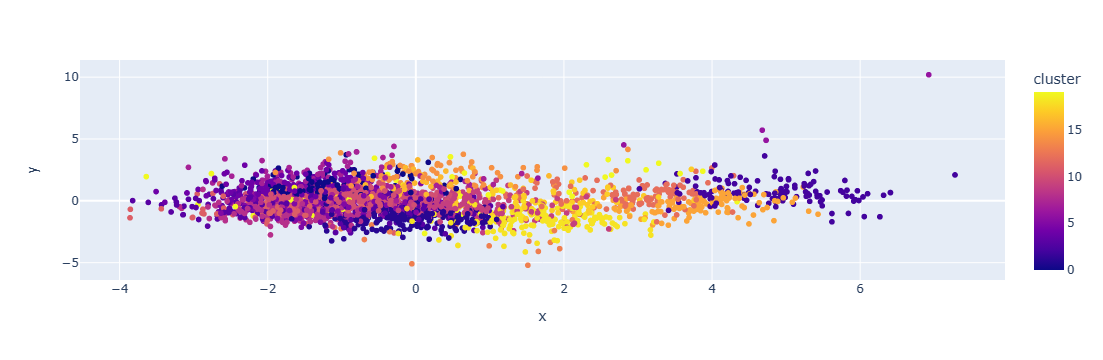

In [151]:
# Visualizing the Clusters with PCA
from sklearn.decomposition import PCA

# Assuming 'data' is your DataFrame containing the dataset
# Replace 'name' and 'cluster_label' with the appropriate column names from your DataFrame
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)

# Replace 'name' and 'cluster_label' with the appropriate column names from your DataFrame
projection['title'] = data['genres']
projection['cluster'] = data['cluster_label']

# Plotting
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()
